# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

* The temperature is warmer around the equator
* The temperature is higher in the south than it is in the north at around this time of year
* There's a higher concentration of humidity in the north than there is in the south
* Cloudiness doesn't seem to have a correlation with latitude
* Wind speed seems pretty consistent at 0-15 with across all latitudes

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

today = date.today()
d1 = today.strftime("%m/%d/%Y")

# Import API key
from api_keys import weather_api_key2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/weather_dataframe.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key2}&units={temp_units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=04ecbe86520d19ea90cbbc5ae6b012f1&units=imperial&q='

## Generate Cities List

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [89]:
# Check
response = requests.get(query_url + city)
print (response.url)
city

http://api.openweathermap.org/data/2.5/weather?appid=04ecbe86520d19ea90cbbc5ae6b012f1&units=imperial&q=honningsvag


'honningsvag'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# set lists for the dataframe
city_name = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind_speed = []
country = []

# Set tracker, counter
counter = 0
set_one = 1

# Loop header
print(f'''Beginning Data Retrieval
-----------------------------''')

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","%20")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if counter > 48:
            counter = 1
            set_one += 1
            city_name.append(city)
        else:
            counter += 1
            city_name.append(city)
        print(f"Processing Record {counter} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vostok
Processing Record 2 of Set 1 | poplar bluff
City not found. Skipping...
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | high level
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | san carlos
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | victoria
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | nohar
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | coahuayana
Processing Record 15 of Set 1 | galle
Processing Record 16 of Set 1 | lukovetskiy
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | akhmim
Processing Record 19 of Set 1 | bonthe
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mazagao
Processing

Processing Record 42 of Set 4 | sendafa
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | acari
City not found. Skipping...
Processing Record 46 of Set 4 | karimpur
Processing Record 47 of Set 4 | svetlogorsk
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | tiksi
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | miyako
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | veinticinco de mayo
Processing Record 8 of Set 5 | belaya gora
Processing Record 9 of Set 5 | xingcheng
Processing Record 10 of Set 5 | yaan
Processing Record 11 of Set 5 | pangody
Processing Record 12 of Set 5 | lompoc
Processing Record 13 of Set 5 | semporna
City not found. Skipping...
Processing Record 14 of Set 5 | axim
Processing Record 15 of Set 5 | piranhas
Processing R

Processing Record 38 of Set 8 | buala
Processing Record 39 of Set 8 | arica
Processing Record 40 of Set 8 | waipawa
Processing Record 41 of Set 8 | olesnica
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | roald
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | santa rosa
Processing Record 47 of Set 8 | bergerac
Processing Record 48 of Set 8 | asfi
Processing Record 49 of Set 8 | shizunai
Processing Record 1 of Set 9 | tiznit
Processing Record 2 of Set 9 | kyren
Processing Record 3 of Set 9 | hailun
Processing Record 4 of Set 9 | balkanabat
Processing Record 5 of Set 9 | guadalupe y calvo
Processing Record 6 of Set 9 | bundaberg
Processing Record 7 of Set 9 | pevek
Processing Record 8 of Set 9 | luwuk
Processing Record 9 of Set 9 | nelson bay
Processing Record 10 of Set 9 | ogaminana
Processing Record 11 of Set 9 | koslan
Processing Record 12 of Set 9 | grand forks
City not found. Skipping...
Processing R

Processing Record 22 of Set 12 | solano
Processing Record 23 of Set 12 | khon buri
Processing Record 24 of Set 12 | souillac
Processing Record 25 of Set 12 | saldanha
City not found. Skipping...
Processing Record 26 of Set 12 | mackay
Processing Record 27 of Set 12 | santa cecilia
Processing Record 28 of Set 12 | karnobat
Processing Record 29 of Set 12 | mayumba
Processing Record 30 of Set 12 | xinqing
Processing Record 31 of Set 12 | bakel
Processing Record 32 of Set 12 | panaba
Processing Record 33 of Set 12 | tripoli
Processing Record 34 of Set 12 | tamiahua
Processing Record 35 of Set 12 | nola
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# Create a dictionary for the DF
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

# Create DF from dictionary
weather_df = pd.DataFrame(weather_dict)

# Get df counts
# weather_df.count()

In [71]:
# Display df head
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,vostok,76,RU,1580015416,80,46.49,135.88,7.09,7.49
1,poplar bluff,1,US,1580015818,75,36.76,-90.39,41.00,1.30
2,new norfolk,75,AU,1580015930,30,-42.78,147.06,69.80,21.92
3,hervey bay,40,AU,1580015930,43,-25.30,152.85,88.00,11.41
4,high level,90,CA,1580015931,100,58.52,-117.14,17.60,9.17


In [73]:
# Export to CSV
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

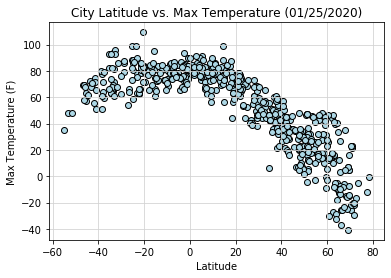

In [74]:
# Scatter plot
plt.scatter(weather_df["Lat."],weather_df["Max Temp"],edgecolors="black",facecolors="lightblue")

# Title & Date

plt.title(f"City Latitude vs. Max Temperature ({d1})")

# Axis Headers
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# 
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

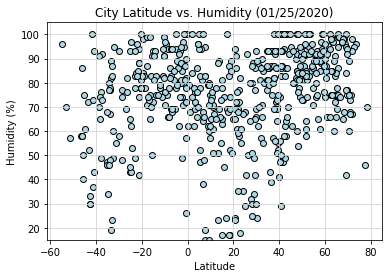

In [75]:
plt.scatter(weather_df["Lat."],weather_df["Humidity"],edgecolors="black",facecolors="lightblue")
plt.title(f"City Latitude vs. Humidity ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

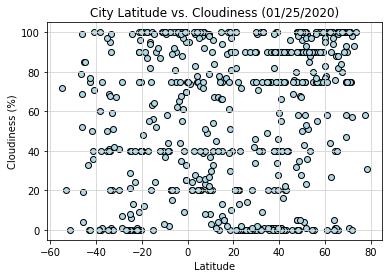

In [76]:
plt.scatter(weather_df["Lat."],weather_df["Cloudiness"],edgecolors="black",facecolors="lightblue")
plt.title(f"City Latitude vs. Cloudiness ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

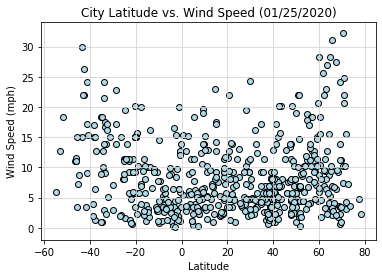

In [90]:
plt.scatter(weather_df["Lat."],weather_df["Wind Speed"],edgecolors="black",facecolors="lightblue")
plt.title(f"City Latitude vs. Wind Speed ({d1})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/Wind Speed.png")
plt.show()

## Linear Regression

In [78]:
# OPTIONAL: Create a function to create Linear Regression plots



In [79]:
# Create Northern and Southern Hemisphere DataFrames

# North
northern_lat = weather_df["Lat."] > 0
northern_df = weather_df[northern_lat]

# South
southern_lat = weather_df["Lat."] < 0
southern_df = weather_df[southern_lat]

northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,vostok,76,RU,1580015416,80,46.49,135.88,7.09,7.49
1,poplar bluff,1,US,1580015818,75,36.76,-90.39,41.00,1.30
4,high level,90,CA,1580015931,100,58.52,-117.14,17.60,9.17
6,san carlos,37,VE,1580015931,57,9.66,-68.58,73.78,3.22
8,victoria,20,HK,1580015309,77,22.29,114.16,64.99,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

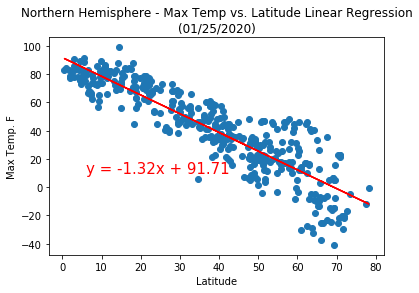

r-squared: -0.8877828904363916
p-value: 7.57716457850302e-135
y = -1.32x + 91.71


In [80]:
# Add the linear regression equation and line to plot
x_values = northern_df["Lat."]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f'''Northern Hemisphere - Max Temp vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

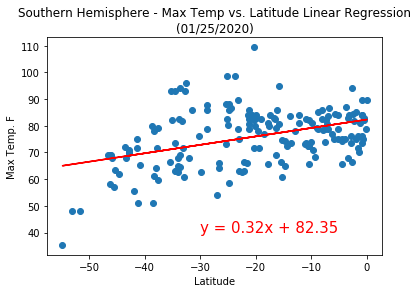

r-squared: 0.41873508613247756
p-value: 5.998684552524672e-09
y = 0.32x + 82.35


In [81]:
# Add the linear regression equation and line to plot
x_values = southern_df["Lat."]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

plt.title(f'''Southern Hemisphere - Max Temp vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

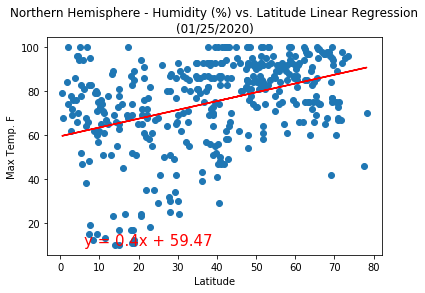

r-squared: 0.38771624995569515
p-value: 1.181219587504478e-15
y = 0.4x + 59.47


In [82]:
# Add the linear regression equation and line to plot
x_values = northern_df["Lat."]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f'''Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

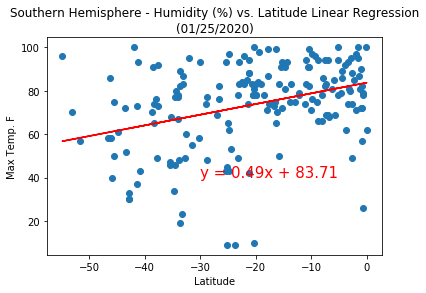

r-squared: 0.35436589201592256
p-value: 1.2164563086471309e-06
y = 0.49x + 83.71


In [83]:
# Add the linear regression equation and line to plot
x_values = southern_df["Lat."]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

plt.title(f'''Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

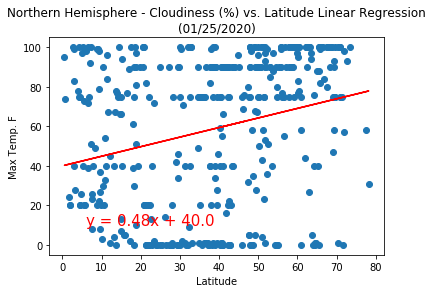

r-squared: 0.2610783483737753
p-value: 1.3593572747713831e-07
y = 0.48x + 40.0


In [84]:
# Add the linear regression equation and line to plot
x_values = northern_df["Lat."]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f'''Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

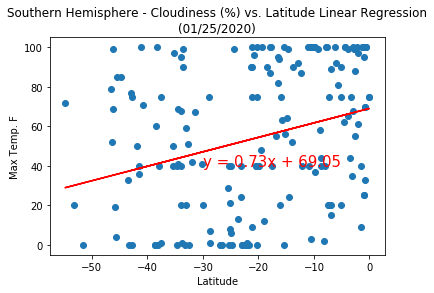

r-squared: 0.2884611088484777
p-value: 9.431519211133168e-05
y = 0.73x + 69.05


In [85]:
# Add the linear regression equation and line to plot
x_values = southern_df["Lat."]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

plt.title(f'''Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

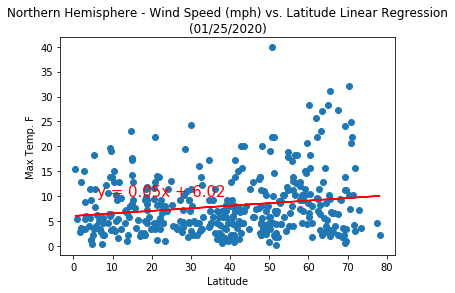

r-squared: 0.17131020140707887
p-value: 0.0006179853271455097
y = 0.05x + 6.02


In [86]:
# Add the linear regression equation and line to plot
x_values = northern_df["Lat."]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title(f'''Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

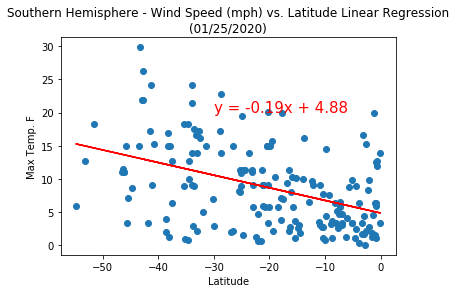

r-squared: -0.42890060701314553
p-value: 2.326970725130728e-09
y = -0.19x + 4.88


In [87]:
# Add the linear regression equation and line to plot
x_values = southern_df["Lat."]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")

plt.title(f'''Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
({d1})''')
plt.xlabel('Latitude')
plt.ylabel('Max Temp. F')
plt.show()
print(f'''r-squared: {rvalue}
p-value: {pvalue}
{line_eq}''')